# Statistical Insights and Hypothesis Testing: A Study on Northwind Database
### Applying Hypothesis Tests to the Northwind Sample Database for Data-Driven Insights

### Introduction

Welcome to this analytical project where we delve into the Northwind database to extract actionable business insights. The Northwind database serves as a comprehensive dataset that encapsulates various facets of a business, from customer details to product sales.

### Project Goal

The overarching goal is to employ statistical hypothesis testing to validate or invalidate assumptions about business operations. The insights derived could be pivotal in shaping effective business strategies.

### What is Hypothesis Testing?

Hypothesis testing is a statistical method used to make inferences or educated guesses about a population based on a sample of data. In the context of business, it can be used to validate assumptions made about sales, customer behavior, and other operational metrics.

- **Null Hypothesis (H0):** This is the initial assumption that there is no effect or relationship between variables. It serves as the starting point that we aim to test against.

- **Alternative Hypothesis (Ha):** This is what you want to prove. It is the opposite of the null hypothesis and indicates the presence of an effect or relationship.

**Example:** If we assume that the average spending of customers from two different regions is the same, that's our null hypothesis (H0). The alternative hypothesis (Ha) would be that the average spending is different between these two regions.

### Types of Statistical Tests

We will employ a variety of statistical tests to answer different types of questions:

- **T-Tests:** Used for comparing the means between two groups.

- **Chi-Square Tests:** Ideal for examining the relationship between categorical variables.

- **ANOVA:** Useful for comparing means across three or more groups.

- **Z-Tests:** Employed when the sample size is large, to compare sample and population means.

- **F-Tests:** Used to compare the variances of two different samples.

- **Regression Analysis:** Applied for predicting outcomes based on relationships between variables.

### Importance of Statistical Testing

Statistical tests are crucial for several reasons:

- **Validation:** They help validate or invalidate business assumptions, lending credibility to strategies.

- **Insight Generation:** They can uncover hidden trends and relationships in the data.

- **Risk Mitigation:** They provide a data-backed approach to decision-making, reducing business risks.

- **Strategic Planning:** Empirical data supports the formulation of more effective and targeted business strategies.

Let's dive into the data and start our journey of discovery!


## Hypothesis Testing Scenarios

### Discounts and Order Quantity

**Problem Statement:** Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

**Test:** ANOVA (to compare means across multiple discount levels)

### Employee Sales Performance

**Problem Statement:** Is there a significant difference in the number of sales made by employees based on their tenure or region?

**Test:** T-Test or ANOVA (depending on the number of groups being compared)

### Order Frequency by Region

**Problem Statement:** Is there a significant association between a customer's region and the frequency of their orders?

**Test:** Chi-Square Test of Independence

### Product Popularity by Category

**Problem Statement:** Are certain product categories ordered more frequently than others?

**Test:** ANOVA or Chi-Square Test (depending on the nature of the data)

### Supplier Impact on Order Quantity

**Problem Statement:** Do certain suppliers contribute to a significantly higher order quantity than others?

**Test:** ANOVA

### Shipping Time Impact on Customer Satisfaction

**Problem Statement:** Does a longer shipping time lead to lower customer satisfaction ratings?

**Test:** Regression Analysis

### Price Elasticity of Products

**Problem Statement:** How does the price of a product influence its sales volume? Is there a significant relationship?

**Test:** Regression Analysis

### Seasonal Effects on Sales

**Problem Statement:** Are there certain months or seasons where sales are significantly higher?

**Test:** Time Series Analysis or T-Test

### Customer Lifetime Value by Region

**Problem Statement:** Is the average lifetime value of a customer significantly different across regions?

**Test:** ANOVA

### Effect of Discount Depth on Sales Volume

**Problem Statement:** Does offering deeper discounts (e.g., 20% vs. 10%) result in a significantly higher sales volume?

**Test:** Z-Test (especially if comparing to a larger population or benchmark)


<sub><sup>
**Confidence Intervals:**

*Concept:* Estimate the range in which a population parameter lies with a certain level of confidence.

*Application:* Calculate the confidence interval for the average order quantity or average order value.

**Binomial Distribution and Tests:**

*Concept:* Understand the distribution of successes in a fixed number of independent Bernoulli trials.

*Application:* Analyze the success rate of a specific product being ordered when presented in a promotional offer.

**Bayesian Inference:**

*Concept:* Update the probability estimate for a hypothesis as more evidence becomes available.

*Application:* Update the probability of a product being reordered based on new monthly sales data.

**Power Analysis:**

*Concept:* Determine the sample size required to detect an effect of a given size with a given degree of confidence.

*Application:* Determine how many orders you need to sample to detect a 5% increase in sales due to a new marketing strategy.

**Chebyshev's Inequality:**

*Concept:* Provides a lower bound on the probability that a random variable lies within a certain number of standard deviations away from its mean.

*Application:* Analyze the variability of product prices or order quantities.

**Central Limit Theorem:**

*Concept:* For sufficiently large sample sizes, the distribution of the sample mean will be approximately normally distributed, regardless of the distribution of the population.

*Application:* Demonstrate this concept by sampling different sizes from order quantities and plotting the resulting distributions.

**Poisson Distribution:**

*Concept:* Represents the number of events occurring in a fixed interval of time or space.

*Application:* Model the number of orders received in fixed intervals of time (e.g., daily).

**Non-parametric Tests:**

*Concept:* Statistical tests that do not assume a specific distribution for the data.

*Application:* Use the Mann-Whitney U test or Kruskal-Wallis test to compare order quantities across different categories when data doesn't meet normality assumptions.

**Effect Size:**

*Concept:* Quantify the size of the difference between two groups, independent of sample size.

*Application:* After conducting a t-test or ANOVA, calculate the effect size (like Cohen's d) to understand the practical significance of the results.

**Survival Analysis:**

*Concept:* Analyze the expected duration of time until one or more events happen.

*Application:* Analyze the duration between a customer's first order and a subsequent reorder.
</sub></sup>


In [52]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.patches import Rectangle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import pingouin as pg
from scipy.stats import probplot
from scipy.stats import t

#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [28]:
os.listdir('D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data')

['categories.csv',
 'customers.csv',
 'employees.csv',
 'employee_territories.csv',
 'orders.csv',
 'orders_details.csv',
 'products.csv',
 'regions.csv',
 'shippers.csv',
 'suppliers.csv',
 'territories.csv']

In [29]:
# load data
# Define the list of table names (CSV filenames)
table_names = [
    'categories',
    'customers',
    'employees',
    'employee_territories',
    'orders',
    'orders_details',
    'products',
    #'regions',
    'shippers',
    'suppliers',
    #'territories'
]

# Specify the base directory where your "Data" folder is located
base_directory = r'D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data'

# Loop through the table names and read each CSV file into a DataFrame
for table in table_names:
    # Construct the full path to the CSV file using os.path.join
    csv_file_path = os.path.join(base_directory, f'{table}.csv')
    
    # Read the CSV file into a DataFrame and assign it to a variable with the same name as the table
    exec(f"{table} = pd.read_csv('{csv_file_path}')")

In [30]:
# load remaining data
regions = pd.read_csv(r'D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data\regions.csv')
territories = pd.read_csv(r"D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data\territories.csv")

In [31]:
# check dataframes loaded properly or not
tables= [categories,
 customers,
 employees,
 employee_territories,
 orders,
 orders_details,
 products,
 regions,
 shippers,
 suppliers,
 territories]


for table in tables:
        print(table.head(3))

   categoryid categoryname                                        description  \
0           1    Beverages        Soft drinks, coffees, teas, beers, and ales   
1           2   Condiments  Sweet and savory sauces, relishes, spreads, an...   
2           3  Confections                Desserts, candies, and sweet breads   

  picture  
0      \x  
1      \x  
2      \x  
  customerid                         companyname     contactname  \
0      ALFKI                 Alfreds Futterkiste    Maria Anders   
1      ANATR  Ana Trujillo Emparedados y helados    Ana Trujillo   
2      ANTON             Antonio Moreno Taquería  Antonio Moreno   

           contacttitle                        address         city region  \
0  Sales Representative                  Obere Str. 57       Berlin    NaN   
1                 Owner  Avda. de la Constitución 2222  México D.F.    NaN   
2                 Owner                Mataderos  2312  México D.F.    NaN   

  postalcode  country         phone      

Data Model


![Image Alt Text](https://drive.google.com/uc?export=download&id=1tTeLCT-niYwD-q8pQzw9RdrWZ4Me2A6_)


## 1.Investigating the Impact of Discounts on Product Orders

## Does offering discounts significantly influence the quantity of products ordered by customers? If so, which discount levels are most effective?

## Experimental Design: Analyzing the Impact of Sales Discounts on Order Quantity

### Background
Sales discounts are a strategic tool employed by businesses to boost revenue. By attracting more customers and incentivizing larger purchases, discounts can significantly enhance sales volume. However, the key lies in determining the optimal discount level that maximizes revenue without compromising profit margins.

### Objective
The primary aim of this analysis is to ascertain whether discounts influence the quantity of products ordered by customers. Furthermore, we seek to identify which specific discount levels yield the most significant impact on order quantities.

### Data Source
For this analysis, we will utilize the order_details table, which provides comprehensive data on orders, products, and associated discounts.

![Hypothesis Testing Steps](https://drive.google.com/uc?export=download&id=1BDpyYCRkhx2YmflQVohTdASz4ahMeo2R)

*Image Source: [Hypothesis Testing Steps](https://medium.com/analytics-vidhya/hypothesis-testing-steps-235d2670cad4)*

### Hypotheses
- **Null Hypothesis (H0):** Discounts do not have a statistically significant effect on the quantity of products ordered by customers.
  
- **Alternative Hypothesis (Ha):** Discounts have a statistically significant effect on the quantity of products ordered by customers.


#### EDA 

In [32]:
orders_details.head()

,orderid,productid,unitprice,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [33]:
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orderid    2155 non-null   int64  
 1   productid  2155 non-null   int64  
 2   unitprice  2155 non-null   float64
 3   quantity   2155 non-null   int64  
 4   discount   2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


No Missing values, data is clean

In [34]:
# descriptive analysis of the data
orders_details.describe() 

,orderid,productid,unitprice,quantity,discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


* The quantity column, which we are primarily interested in, has values ranging from 1 to 130 with a mean of approximately 23.81.
* The discount column values range from 0 (no discount) to 0.25 (25% discount) with an average discount of approximately 5.62%.

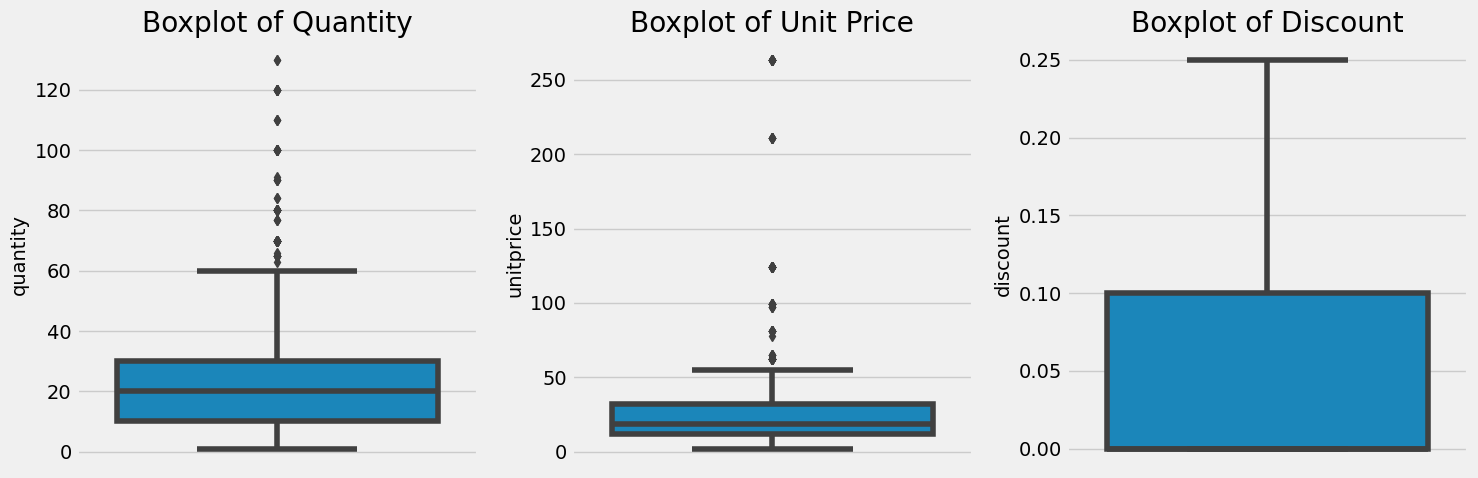

In [35]:
# Plotting box plots to visualize outliers
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=orders_details['quantity'], ax=ax[0])
ax[0].set_title('Boxplot of Quantity')

sns.boxplot(y=orders_details['unitprice'], ax=ax[1])
ax[1].set_title('Boxplot of Unit Price')

sns.boxplot(y=orders_details['discount'], ax=ax[2])
ax[2].set_title('Boxplot of Discount')

plt.tight_layout()
plt.show()


Outliers:

Quantity: There are some higher order quantities that are considered outliers, but these might be bulk orders or specific promotions.

Unit Price: There are several outliers on the higher end. This suggests some products are priced significantly higher than others.

Discount: The data seems fairly consistent, with no significant outliers. However, there are some discounts around 1-6% that appear less frequent than others.

Given the nature of the data (sales/orders), it's plausible to have outliers, especially for bulk orders or premium products. We'll keep these in mind as we proceed, but we won't remove them just yet. Business context and further analysis will guide us on how to handle them.

In [36]:
orders_details['discount'].value_counts()  # to see the level of discounts values

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.04       1
0.06       1
0.01       1
Name: discount, dtype: int64

In [37]:
# create a new data frame showing the percentage by discount amount.
# Group by 'discount' and count the number of 'productid' for each discount amount
disc_given = orders_details.groupby('discount').agg({'productid':'count'}).reset_index().rename(columns={'productid':'Discounts', 'discount':'Discount_amount'})

# Calculate the percentage discount
disc_given['disc_per'] = round((disc_given.Discounts / disc_given.Discounts.sum()) * 100, 0)


# Display the resulting dataframe
disc_given.head()


,Discount_amount,Discounts,disc_per
0,0.00,1317,61.0
1,0.01,1,0.0
2,0.02,2,0.0
3,0.03,3,0.0
4,0.04,1,0.0


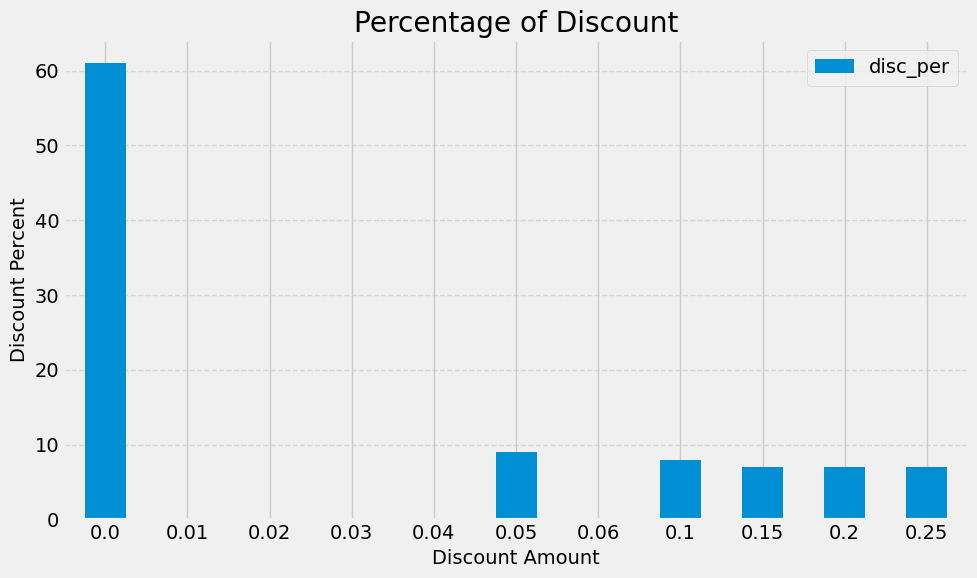

In [38]:
# plot the percentage discount

disc_given.plot(x='Discount_amount', y='disc_per', kind='bar', figsize=(10, 6))
plt.xlabel('Discount Amount')
plt.ylabel('Discount Percent')
plt.title('Percentage of Discount')
plt.legend(loc='upper right')  # Adjusting the legend position for clarity
plt.xticks(rotation=0)  # Ensuring the x-axis labels are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
#create control and experimental groups

population = orders_details['quantity']
non_disc = orders_details[orders_details['discount']==0]
non_disc = non_disc['quantity']

disc = orders_details[orders_details['discount']!=0]
disc = disc['quantity']

In [40]:
# finding the mean for the discounted & non discounted group
disc_ave=disc.mean()
print (f'The average quantity for discounted orders is {disc_ave }')
nondisc_ave=non_disc.mean()
print (f'The average quantity for non discounted orders is {nondisc_ave }')

The average quantity for discounted orders is 27.10978520286396
The average quantity for non discounted orders is 21.715261958997722


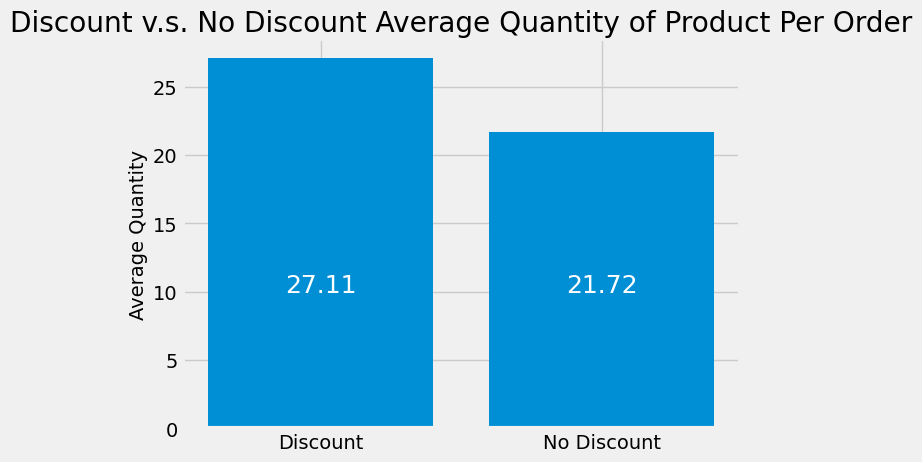

In [41]:
X = ['Discount', 'No Discount']
y = [disc.mean(),
     non_disc.mean()]
plt.bar(X,y)
plt.text(s=round(y[1],2), x=1, y=10, color="w", horizontalalignment='center',size=18)
plt.text(s=round(y[0],2), x=0, y=10, color="w", horizontalalignment='center',size=18)
plt.ylabel('Average Quantity')
plt.title('Discount v.s. No Discount Average Quantity of Product Per Order')
plt.show()

Upon examining the average order quantities, it's evident that orders with discounts tend to have a higher average compared to those without discounts. However, to ensure that this observed difference isn't merely a result of random variation, we'll proceed with a hypothesis test.

## Checking for Assumptions: Normality & Randomness

### Before delving into the hypothesis test, it's crucial to ensure our data meets certain assumptions:

**Randomness:** The observations in our dataset should be random, ensuring there's no underlying pattern or bias.

**Normality:** The distribution of the data should approximate a normal distribution. This is especially important for certain statistical tests.

**Population Size:** Given the manageable size of our dataset, we're analyzing the entire population. This eliminates concerns related to sampling bias and sampling error.

With these assumptions in mind, our immediate next step is to assess the normality of our data distribution.


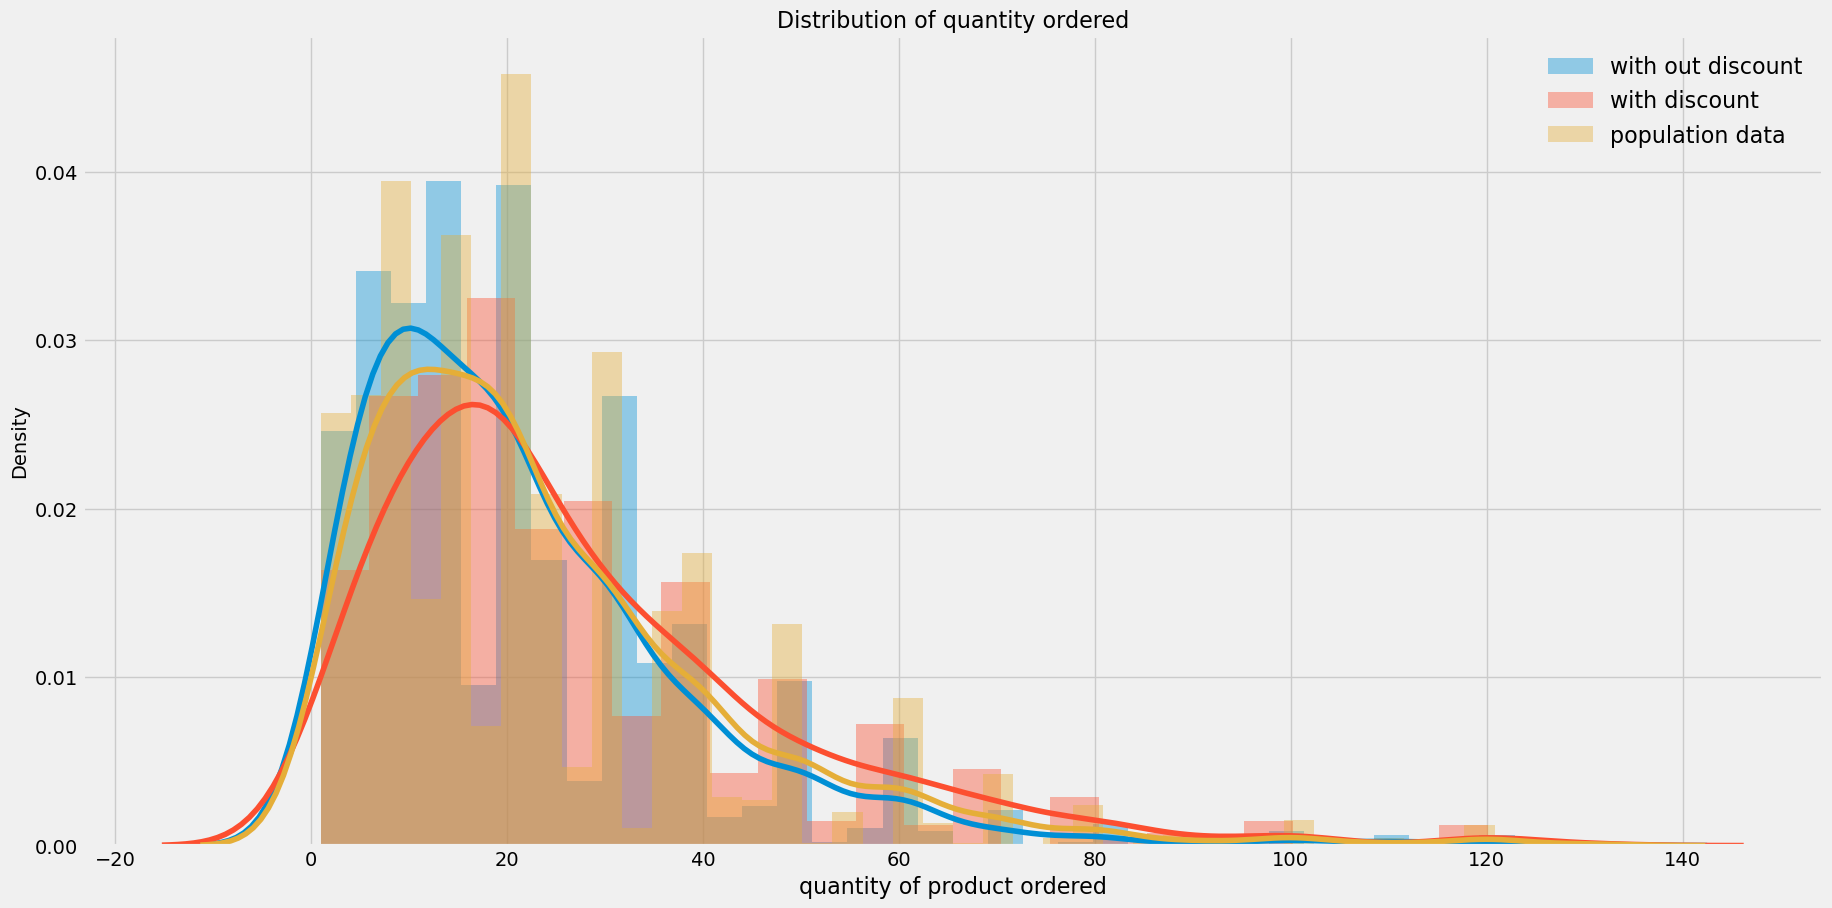

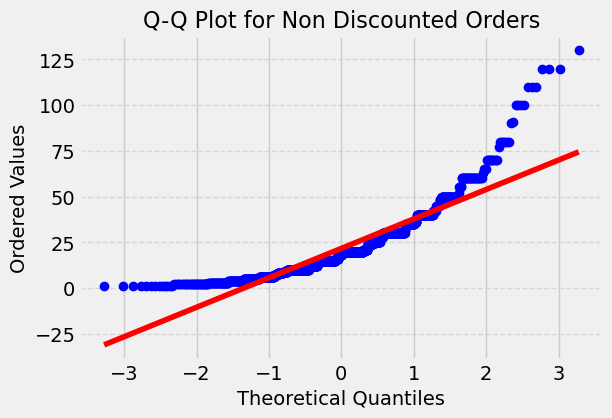

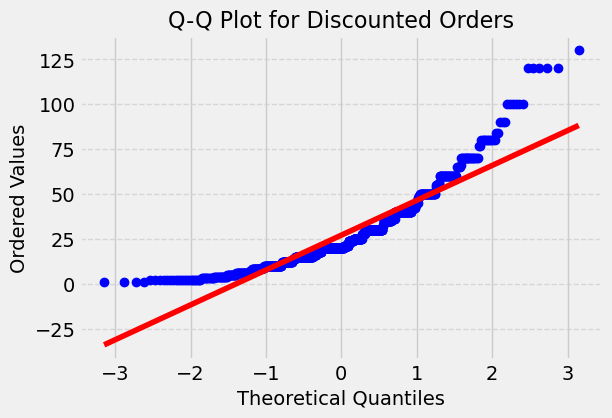

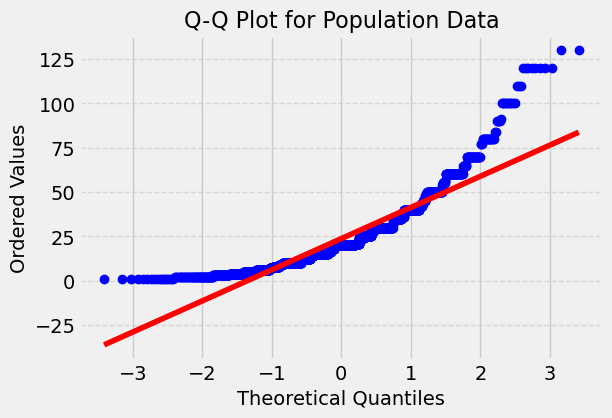

In [42]:
# Normality check 

#plotting the two groups & the population to check for normality
plt.figure(figsize=(20, 10))
sns.distplot(non_disc, label='with out discount')
sns.distplot(disc, label='with discount')
sns.distplot(population, label='population data')
plt.title('Distribution of quantity ordered', fontsize=16)
plt.xlabel('quantity of product ordered', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')
plt.show()

# Function to plot Q-Q plot
def plot_qq(data, title):
    plt.figure(figsize=(6, 4))
    probplot(data, dist="norm", plot=plt)
    plt.title(title, fontsize=16)
    plt.xlabel('Theoretical Quantiles', fontsize=14)
    plt.ylabel('Ordered Values', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Q-Q plot for non_disc
plot_qq(non_disc, 'Q-Q Plot for Non Discounted Orders')

# Q-Q plot for disc
plot_qq(disc, 'Q-Q Plot for Discounted Orders')

# Q-Q plot for population
plot_qq(population, 'Q-Q Plot for Population Data')

The visualizations indicate that all distributions exhibit right-skewness and deviate from normality. To further validate this observation, we'll employ the Shapiro-Wilk test for normality.

### Shapiro-Wilk Test
#### H0: Distribution is normal
#### HA: Distribution is not normal


In [43]:
stats.shapiro(disc)  #to test if the discounted group distribution is normal

ShapiroResult(statistic=0.8690298795700073, pvalue=6.881066043300527e-26)

KS test is another test to check the for normality and it needs the info for population mean standard deviation. 

In [44]:
population.mean(),population.std()

(23.812993039443157, 19.022046977493545)

In [45]:
# using KS test to check for nornmality
stats.kstest(disc, 'norm', args=(23.81, 19.02))

KstestResult(statistic=0.12098208878960003, pvalue=3.802483260016832e-11, statistic_location=2, statistic_sign=-1)

#### Given that the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis. This suggests that the distribution of the discounted group does not follow a normal distribution.

In [46]:
stats.shapiro(non_disc) # to test if the non discounted group is normal

ShapiroResult(statistic=0.8434569835662842, pvalue=3.8037236246970394e-34)

#### Given that the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis. This suggests that the distribution of the non discounted group does not follow a normal distribution.

In [47]:
print(len(disc))
print(len(non_disc))

838
1317


### Selecting the Appropriate Test Statistic

When analyzing our data, it's essential to choose the right statistical test to ensure valid results. One of the primary considerations is the distribution of the data.

**Normality and Sample Size**

While our data does not strictly adhere to the normality assumption, we can take solace in the Central Limit Theorem. This theorem states that, given a sufficiently large sample size (typically considered to be more than 30), the sampling distribution of the mean will be approximately normal, regardless of the distribution of the underlying data. Given that our sample size is large, we can confidently proceed with the t-test.

**Assessing Variance with the Levene Test**

Before selecting the specific type of t-test, it's crucial to determine if the variances of our two groups (discounted and non-discounted) are equal. The Levene test is a tool that helps us test this assumption.

**Hypotheses for the Levene Test:**

- Null Hypothesis (H0): The variance in the discounted group is equal to the variance in the non-discounted group.

- Alternative Hypothesis (HA): The variance in the discounted group is not equal to the variance in the non-discounted group.

By understanding the variances, we can select the most appropriate version of the t-test for our analysis.


In [48]:
#Testing for equal variance between the discounted & non discounted group
stats.levene(disc, non_disc)

LeveneResult(statistic=14.832671704073421, pvalue=0.00012091378376079568)

##### With low p value we reject the null hypothesis and conclude that the two groups have different variances. since the two groups have different sample sizes & variances Welch's t test the appropriate test.

In [49]:
# Welch's t test between discounted & non discounted group
stats.ttest_ind(disc, non_disc, equal_var=False)

Ttest_indResult(statistic=6.239069142123972, pvalue=5.65641429030433e-10)

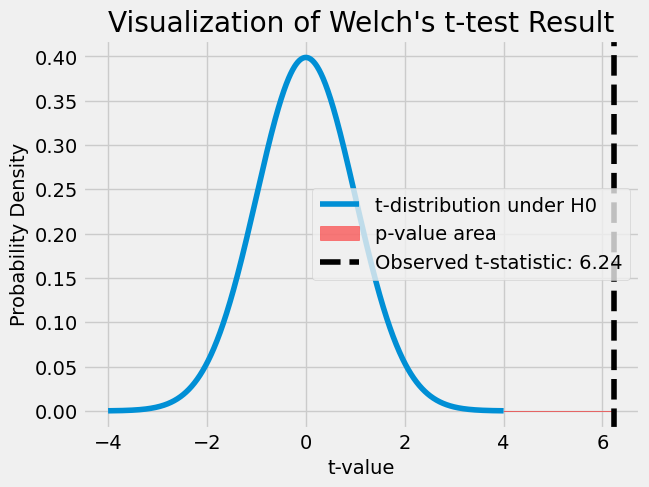

In [53]:
t_stat, p_value = stats.ttest_ind(disc, non_disc, equal_var=False)

# Degrees of freedom for Welch's t-test
df = len(disc) + len(non_disc) - 2

# Generate values for t-distribution
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

# Plot t-distribution
plt.plot(x, y, label="t-distribution under H0")

# Highlight area under curve beyond observed t-statistic
x_fill = np.linspace(t_stat, 4, 100)
y_fill = t.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label="p-value area")

# Indicate observed t-statistic
plt.axvline(t_stat, color='black', linestyle='--', label=f"Observed t-statistic: {t_stat:.2f}")

plt.title("Visualization of Welch's t-test Result")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

Another test  we can use is Monte Carlo test. This test doesn't require the normality assumption and it is the best choice when the data is not normal. 

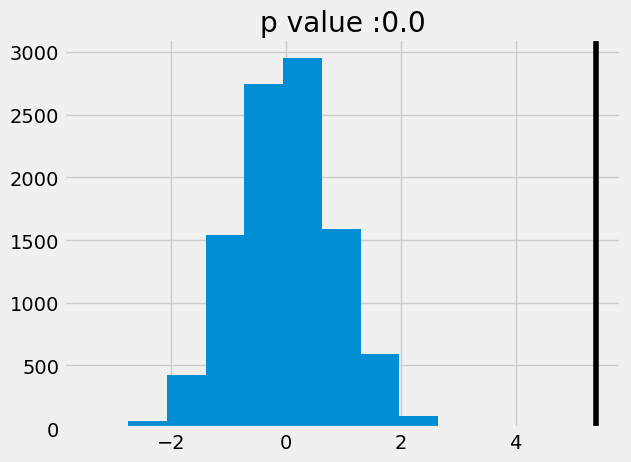

In [55]:
# monte carlo simulation to calculate p value

mean_diff = disc.mean() - non_disc.mean()
sample_diffs = []
counter = 0
for i in range(10000):
    sample1 = orders_details.sample(replace=False, n=len(disc))
    sample2 = orders_details.drop(sample1.index,axis=0)
    sample_diff = sample1['quantity'].mean() - sample2['quantity'].mean()
    sample_diffs.append(sample_diff)
    if sample_diff > mean_diff:
        counter += 1
plt.hist(sample_diffs)
plt.axvline(mean_diff,color = 'k')
plt.title(f'p value :{np.round(counter/10000,3)}')
plt.show()

#### Based on the results from both the Monte Carlo simulation and the Welch's t-test, we observe a p-value less than 0.05. This leads us to reject the null hypothesis, suggesting that discounts do indeed have a statistically significant impact on the quantity of products purchased.

#### To check how high the effect is we check the effect size by using Cohen's D test.his is a measure of effect size used specifically for the difference between two means. It's calculated as the difference between the two means divided by the pooled standard deviation. A larger absolute value of Cohen's d indicates a larger effect size

In [66]:
# create a function to calculate Cohen's D for any two given groups

def Cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()
    n1,n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pooled_var = (n1 * var1 + n2*var2)/(n1+n2)
    # Calculate Cohen's d statistic
    d = diff/ np.sqrt(pooled_var)
   
    return d

In [67]:
round(abs(Cohen_d(non_disc, disc)), 1) # taking absolute value of Cohen's d and round is to 1 decimal point

0.3

In [68]:
def cohens_d_confidence_interval(group1, group2, alpha=0.05):
    # Calculate Cohen's D
    d = Cohen_d(group1, group2)
    
    # Calculate the variance and sample size for each group
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    # Calculate the standard error of d
    sed = np.sqrt((var1/n1 + var2/n2)**2 / (n1 + n2))
    
    # Calculate the confidence interval
    df = n1 + n2 - 2
    ci_low = d - stats.t.ppf(1 - alpha/2, df) * sed
    ci_high = d + stats.t.ppf(1 - alpha/2, df) * sed
    
    return ci_low, ci_high

# Calculate the 95% CI for Cohen's D
ci_low, ci_high = cohens_d_confidence_interval(disc, non_disc)
print(f"The 95% confidence interval for Cohen's D is ({ci_low:.3f}, {ci_high:.3f})")

The 95% confidence interval for Cohen's D is (0.255, 0.318)


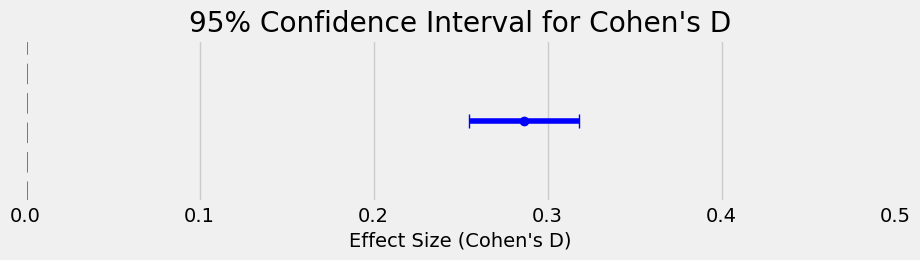

In [69]:
# Values
effect_size = (ci_low + ci_high) / 2
error = (ci_high - ci_low) / 2

# Plot
plt.figure(figsize=(10, 2))
plt.errorbar(effect_size, 0, xerr=error, fmt='o', color='blue', capsize=5)
plt.yticks([])
plt.xlim(0, 0.5)
plt.title("95% Confidence Interval for Cohen's D")
plt.xlabel("Effect Size (Cohen's D)")
plt.axvline(0, color='red', linestyle='--')
plt.show()

#### Effect Size Analysis using Cohen's D
#### The calculated Cohen's D value for our data is 0.3. This value falls within the "small" effect size range, suggesting that while the discount does have a statistically significant impact on the quantity sold, the magnitude of this effect is relatively modest.

### Analyzing the Impact of Different Discount Levels

To understand the influence of discounts on sales, it's crucial not only to determine if discounts have an effect, but also to discern whether different discount levels vary in their impact. This requires a comparison across multiple discount levels.

**ANOVA (Analysis of Variance)** is a powerful statistical method that allows us to make these comparisons and determine if the differences between the groups (discount levels) are statistically significant.

**Hypotheses:**

- Null Hypothesis (H₀): The mean quantity of products ordered remains consistent across all discount levels.

- Alternative Hypothesis (Hₐ): At least one discount level has a different mean quantity of products ordered compared to the others.

By conducting the ANOVA test, we aim to either accept the null hypothesis, suggesting that discount levels don't significantly vary in their effect, or reject it in favor of the alternative, indicating varying impacts of different discount levels.


0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.04       1
0.06       1
0.01       1
Name: discount, dtype: int64